In [55]:
import pandas as pd #import packages required
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [4]:
df=pd.read_excel('default of credit card clients.xls',header=1) # read the data

In [5]:
df.head() # checking first five columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape # check shape of the dataset
# data has 30000 rows and 25 columns

(30000, 25)

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.info() # checking information of the data

# there are no null values in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df.rename(columns={'default payment next month':'Default'},inplace=True) # renaming the default column
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<AxesSubplot:>

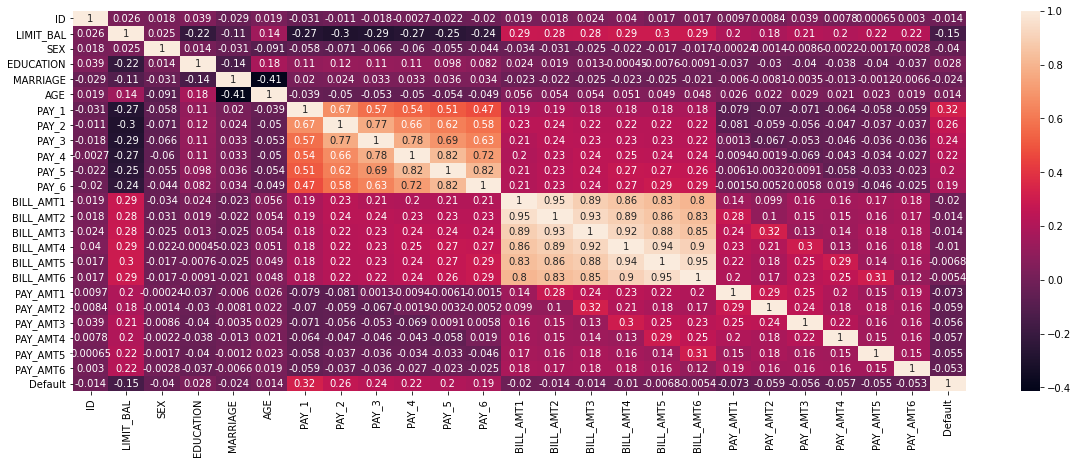

In [11]:
# data analysing
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True) #  check correlation of data
# Pay0 to pay6 correlate with Default

In [12]:
# ploting defaulters value counts
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

In [13]:
# probability of default
df.Default.value_counts(normalize=True)*100
# probability of not default is 77.88% while default is 22.12%

0    77.88
1    22.12
Name: Default, dtype: float64

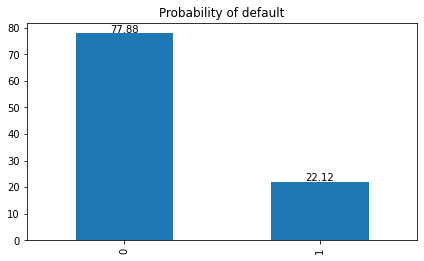

In [14]:
# ax.annotate('text', xy= , xycoodrs= , xytext= , arrowprops= ) used for text annotations
default_pro=df.Default.value_counts(normalize=True)*100
plt.figure(figsize=(7,4))
bars=default_pro.plot.bar()
plt.title('Probability of default')
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

In [15]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='AGE', ylabel='Density'>

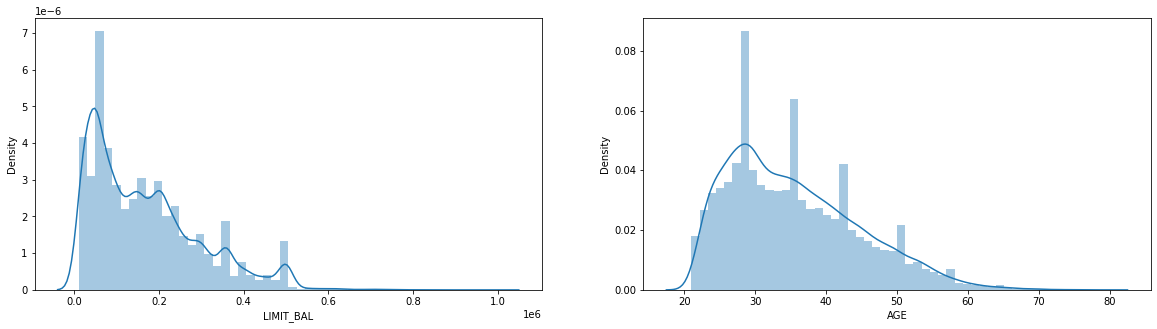

In [16]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

<AxesSubplot:xlabel='LIMIT_BAL'>

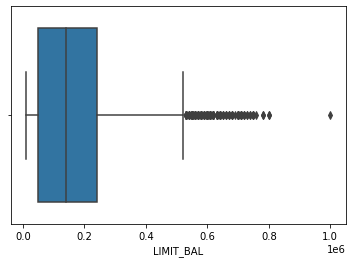

In [17]:
sns.boxplot(data=df,x='LIMIT_BAL',hue='Default')

<AxesSubplot:xlabel='AGE'>

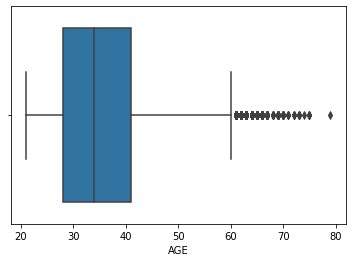

In [18]:
sns.boxplot(data=df,x='AGE')

In [19]:
# more cards with limits less than 200000 and age of customers between 20 to 40
# the both limit and age graphs are right skewed

In [71]:
defaulter=df[df['Default']==1]
non_defaulter=df[df['Default']==0]
defaulter.shape

(6636, 24)

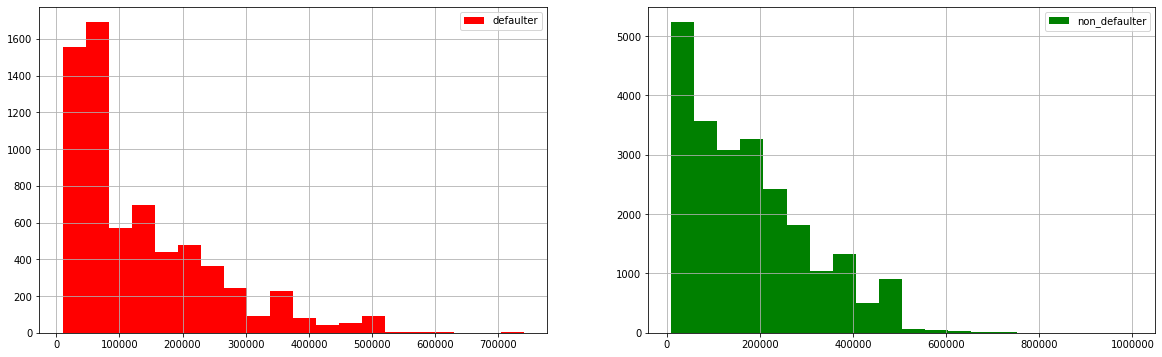

In [21]:
# defaulter with limit amount
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
defaulter.LIMIT_BAL.hist(bins=20,label='defaulter',color='red')
plt.legend()
plt.subplot(1,2,2)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
non_defaulter.LIMIT_BAL.hist(bins=20,label='non_defaulter',color='green')
plt.legend()

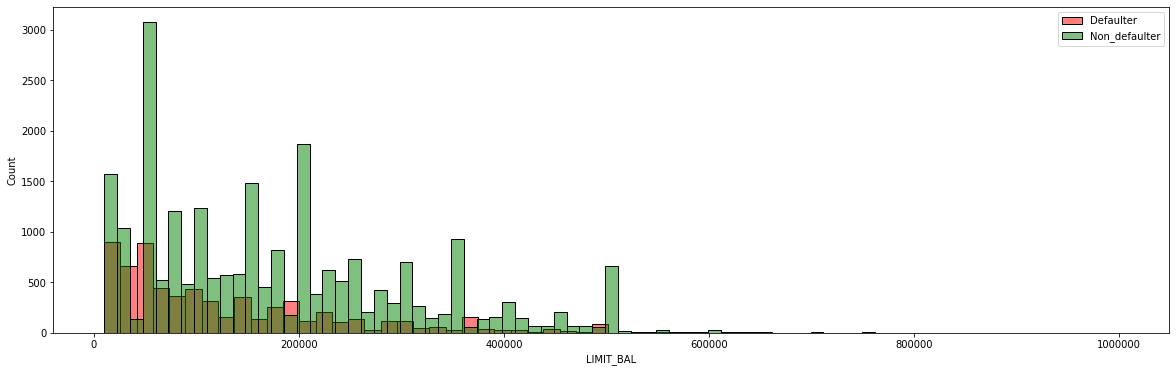

In [22]:
plt.figure(figsize=(20,6))
sns.histplot(defaulter.LIMIT_BAL,color='red',alpha=0.5,label='Defaulter')
sns.histplot(non_defaulter.LIMIT_BAL,color='g',alpha=0.5,label='Non_defaulter')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.legend()

In [23]:
# cards with lower limit have high defaulters

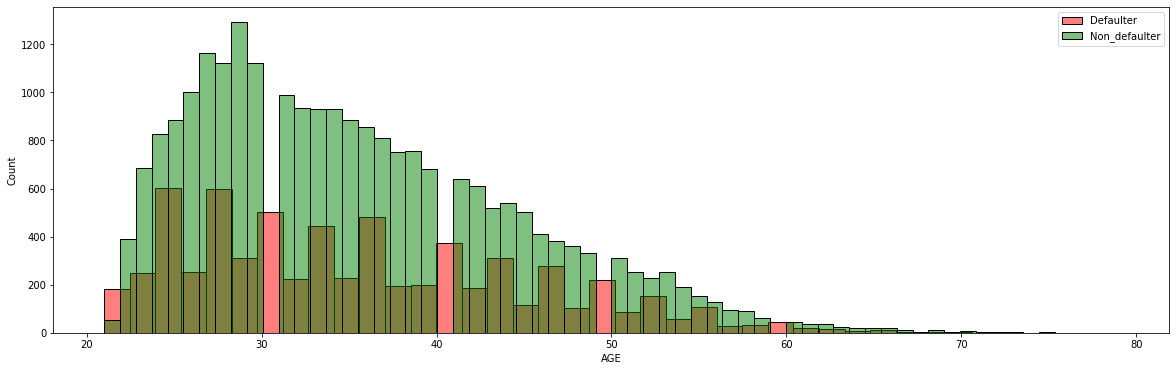

In [24]:
# age with defaulters
plt.figure(figsize=(20,6))
sns.histplot(defaulter.AGE,color='red',alpha=0.5,label='Defaulter')
sns.histplot(non_defaulter.AGE,color='g',alpha=0.5,label='Non_defaulter')
plt.legend()

In [25]:
# defaulters are spread around all ages

In [26]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
# change 0,4,5,6 in education to one category like others
df['EDUCATION']=df['EDUCATION'].replace([4,5,6],[0,0,0])
df['PAY_1']=df['PAY_1'].replace([-2,-1],[0,0])
df['PAY_2']=df['PAY_2'].replace([-2,-1],[0,0])
df['PAY_3']=df['PAY_3'].replace([-2,-1],[0,0])
df['PAY_4']=df['PAY_4'].replace([-2,-1],[0,0])
df['PAY_5']=df['PAY_5'].replace([-2,-1],[0,0])
df['PAY_6']=df['PAY_6'].replace([-2,-1],[0,0])

In [28]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

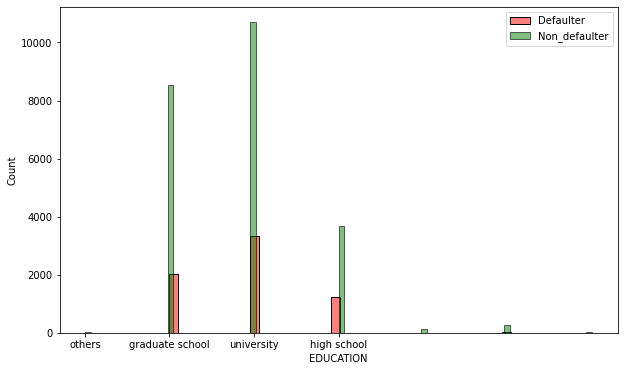

In [29]:
# education with defaulters
plt.figure(figsize=(10,6))
sns.histplot(defaulter.EDUCATION,color='red',alpha=0.5,label='Defaulter')
sns.histplot(non_defaulter.EDUCATION,color='g',alpha=0.5,label='Non_defaulter')
plt.xticks([0,1,2,3],['others','graduate school','university','high school'])
plt.legend()

In [30]:
# defaulters with education are nearly equal in proportions

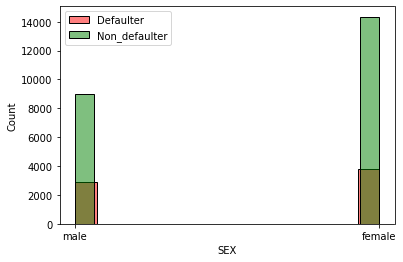

In [31]:
sns.histplot(defaulter.SEX,color='red',alpha=0.5,label='Defaulter')
sns.histplot(non_defaulter.SEX,color='g',alpha=0.5,label='Non_defaulter')
plt.xticks([1,2],['male','female'])
plt.legend()

In [32]:
# there are more female card holders as well as defaulters check the values
def_sex_pr=(defaulter.SEX.value_counts()/df.SEX.value_counts())*100
print('Female Defaulters percentage',def_sex_pr.iloc[0])
print('Male Defaulters percentage',def_sex_pr.iloc[1])

Female Defaulters percentage 20.776280918727917
Male Defaulters percentage 24.16722745625841


In [33]:
# there is more percentage of male defaulters to female defaulters

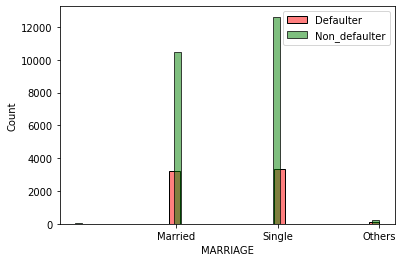

In [34]:
sns.histplot(defaulter.MARRIAGE,color='red',alpha=0.5,label='Defaulter')
sns.histplot(non_defaulter.MARRIAGE,color='g',alpha=0.5,label='Non_defaulter')
plt.xticks([1,2,3],['Married','Single','Others'])
plt.legend()

In [35]:
def_mar_pr=(defaulter.MARRIAGE.value_counts()/df.MARRIAGE.value_counts())*100
print('Married Defaulters percentage: ',def_mar_pr.iloc[0])
print('Unmarried Defaulters percentage: ',def_mar_pr.iloc[1])
print('Other_status Defaulters percentage: ',def_mar_pr.iloc[2])

Married Defaulters percentage:  20.928338762214985
Unmarried Defaulters percentage:  23.471703638626547
Other_status Defaulters percentage:  26.006191950464398


In [36]:
# Marital Status with others have high percentage of defaulters

In [37]:
pd.set_option('display.max_columns',30)

In [38]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


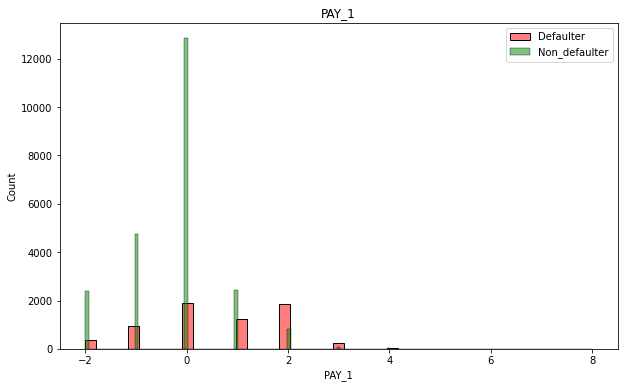

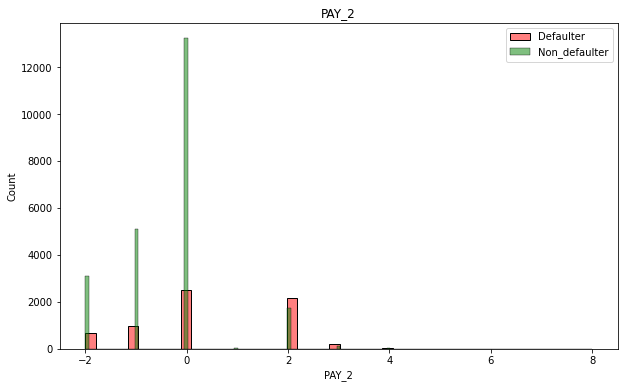

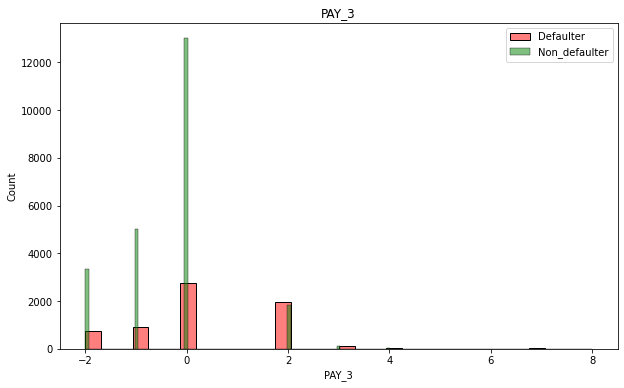

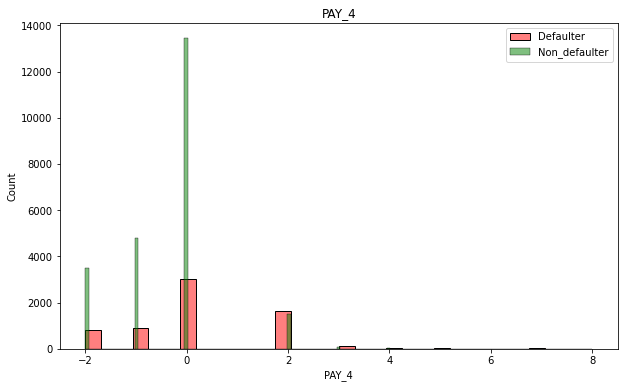

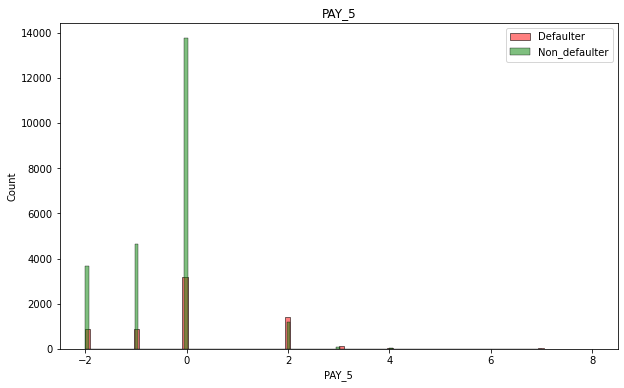

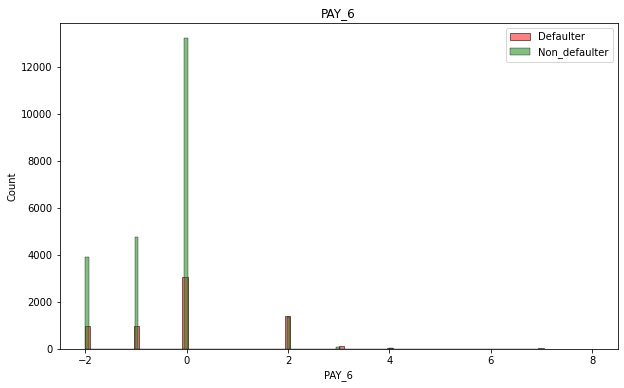

In [39]:
# pay status with default
for col in df.columns[6:12]:
    plt.figure(figsize=(10,6))
    sns.histplot(defaulter[col],color='red',alpha=0.5,label='Defaulter')
    sns.histplot(non_defaulter[col],color='g',alpha=0.5,label='Non_defaulter')
    plt.title(col)
    plt.legend()

##### customers who used to pay early and ontime also might become defaulters but customers who delay for more than one month have more chances of defaulting

In [40]:
## feature encoding and feature transformation
# drop id column which is not required
# sex and marriage are label encoded should be one hot encoded because those categories have equal importance
# feature scaling is required for SVM

In [41]:
df.drop('ID',axis=1,inplace=True)

In [42]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# one hot encoding of sex and marriage
df_encoded=pd.get_dummies(df,columns=['SEX','MARRIAGE'],drop_first=True)

In [44]:
df_encoded.head(10)

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,1,0,0
1,120000,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,1,0,0
4,50000,2,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0
5,50000,1,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,0,1,0
6,500000,1,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0,0,1,0
7,100000,2,23,0,0,0,0,0,0,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,1,0,1,0
8,140000,3,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,1,1,0,0
9,20000,3,35,0,0,0,0,0,0,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0,0,1,0


In [45]:
X=df_encoded.drop('Default',axis=1)
y=df_encoded['Default']

In [46]:
# split the data into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [47]:
# feature scaling
st_scale=StandardScaler()
scaledX_train=st_scale.fit_transform(X_train)
scaledX_test=st_scale.fit_transform(X_test)

In [54]:
# fitting to the model
svm=SVC()
svm_1=svm.fit(scaledX_train,y_train)

In [56]:
# predict y values for x_test
y_pred=svm_1.predict(scaledX_test)

In [62]:
# validating the predicted data
print("accuracy score:",round(accuracy_score(y_test,y_pred),2))
print('\n')
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print('\n')
print('classification report:\n',classification_report(y_test,y_pred))

accuracy score: 0.82


confusion matrix:
 [[7389  376]
 [1362  773]]


classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7765
           1       0.67      0.36      0.47      2135

    accuracy                           0.82      9900
   macro avg       0.76      0.66      0.68      9900
weighted avg       0.81      0.82      0.80      9900



In [64]:
# validating data for X_train
y_train_pred=svm_1.predict(scaledX_train)
print("accuracy score:",round(accuracy_score(y_train,y_train_pred),2))
print('\n')
print("confusion matrix:\n",confusion_matrix(y_train,y_train_pred))
print('\n')
print('classification report:\n',classification_report(y_train,y_train_pred))

accuracy score: 0.83


confusion matrix:
 [[14891   708]
 [ 2805  1696]]


classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     15599
           1       0.71      0.38      0.49      4501

    accuracy                           0.83     20100
   macro avg       0.77      0.67      0.69     20100
weighted avg       0.81      0.83      0.80     20100



In [65]:
# accuracy score for training and test data are nearly equal

Things which are not considered in the model and data:

Hyperparameter tuning

Cross validation

Some features are skewed transformation is required

it is an imbalanced data to be handled 

unkown categories in the features to be handled

outliers to be handled

In [72]:
# saving our modified dataset
df.to_csv('credit_card_modified.csv',index=False)

AttributeError: 'FuncFormatter' object has no attribute 'set_scientific'

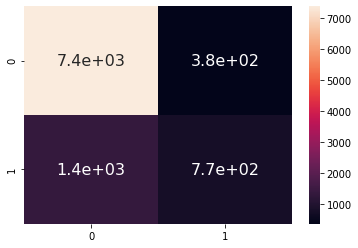